# Natural Language Processing

<div class="alert alert-success">
Natural Language Processing is a field of AI working on how to program the machines to process the large amount of natural language data fruitfully 
</div>

<div class="alert alert-info">
Natural Language Processing: https://en.wikipedia.org/wiki/Natural-language_processing
</div>

In this notebook, we will walk through some basic useful functions in the NLTK package.

# NTLK: Natural Language Toolkit

<div class="alert alert-success">
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
</div>

<div class="alert alert-info">
NLTK: http://www.nltk.org/
</div>

In [1]:
import nltk
%matplotlib inline

In [2]:
# In the cell below, we will download some files from nltk. 
#   If you hit an error doing so, come back to this cell, and uncomment and run the code below. 
#   This code gives python permission to write to your disk (if it doesn't already have persmission to do so)

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/taddy_shuai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taddy_shuai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/taddy_shuai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/taddy_shuai/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/taddy_shuai/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/taddy_shuai/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [4]:
sentence = "UC San Diego is a great place to study cognitive science."

# Tokenisation

<div class="alert alert-info">
https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
</div>

In [5]:
tokens = nltk.word_tokenize(sentence)

In [6]:
print(tokens)

['UC', 'San', 'Diego', 'is', 'a', 'great', 'place', 'to', 'study', 'cognitive', 'science', '.']


# Part-of-speech (POS) Tagging

<div class="alert alert-info">
https://en.wikipedia.org/wiki/Part-of-speech_tagging
</div>

In [7]:
tags = nltk.pos_tag(tokens)

In [8]:
print(tags)

[('UC', 'NNP'), ('San', 'NNP'), ('Diego', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('place', 'NN'), ('to', 'TO'), ('study', 'VB'), ('cognitive', 'JJ'), ('science', 'NN'), ('.', '.')]


# Named Entity Recognition (NER)

<div class="alert alert-info">
https://en.wikipedia.org/wiki/Named-entity_recognition
</div>

In [9]:
entities = nltk.chunk.ne_chunk(tags)

In [10]:
print(entities)

(S
  UC/NNP
  (PERSON San/NNP Diego/NNP)
  is/VBZ
  a/DT
  great/JJ
  place/NN
  to/TO
  study/VB
  cognitive/JJ
  science/NN
  ./.)


# Stop words
<div class="alert alert-info">
<p>"Stop words" usually refers to the most common words in a language.</p>
<p>https://en.wikipedia.org/wiki/Stop_words </p>
</div>


In [11]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Example

We will walk through an example to see how TF-IDF transforms the word distribution in a corpus.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The data we will be looking at is a small subset of the BookCorpus dataset. The original dataset can be found here: http://yknzhu.wixsite.com/mbweb.

For accessing the original BookCorpus dataset, please download the agreement here, sign, date and email a copy to mblist-dataset@cs.toronto.edu. Note that this dataset should only be used for scientific or research purposes in academic affiliations. Any other use is explicitly prohibited.

The original dataset was collected from more than 11,000 books, and has already been tokenised at both sentence and word level. The small subset here contains the first 10,000 sentences.

In [13]:
with open('files/book10k.txt', 'r') as f:
    sents = f.readlines()
sents = [x.strip() for x in sents]

We first take a look at the word frequency in the document, and print out top 10 most frequently appeared words with their frequencies.

In [14]:
tokens = []
[tokens.extend(nltk.word_tokenize(x)) for x in sents]
cnts = Counter(tokens)

In [15]:
TF_top10 = cnts.most_common(10)
TF_top10_tokens = [token for token, cnt in TF_top10]
TF_top10_cnts = [cnt for token, cnt in TF_top10]

Text(0.5,0,'Frequency')

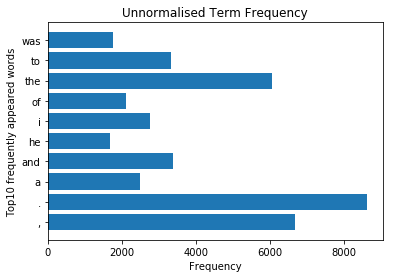

In [16]:
plt.barh(TF_top10_tokens, TF_top10_cnts)
plt.title('Unnormalised Term Frequency')
plt.ylabel('Top10 frequently appeared words')
plt.xlabel('Frequency')

As we can see, 'the', 'was', 'a', etc. appear a lot in the document, and those frequently appeared works don't contribute to the discriminative information in the document, thus, we'd like to down-weight those words.

In [17]:
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

In [18]:
tfidf_books = tfidf.fit_transform(sents).toarray()

The TfidfVectorizer will calculate the inversed document frequency (IDF) for each word, and help us to down-weight those frequently appeared words in the document. Let's plot out the IDF for each of the top 10 most frequently appeared words

In [19]:
IDF_weights = [tfidf.idf_[tfidf.vocabulary_[token]] for token in TF_top10_tokens]

Text(0.5,0,'IDF')

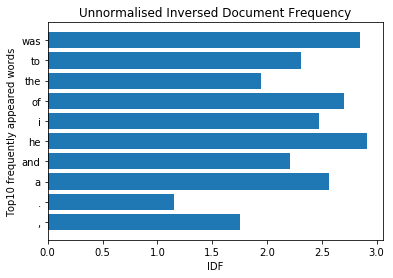

In [20]:
plt.barh(TF_top10_tokens, IDF_weights)
plt.title('Unnormalised Inversed Document Frequency')
plt.ylabel('Top10 frequently appeared words')
plt.xlabel('IDF')

We compare the plot with the following plot that shows the words with top 10 highest IDF.

In [21]:
ind = np.argsort(tfidf.idf_)[::-1][:10]
IDF_top10_tokens = [list(tfidf.vocabulary_)[x] for x in ind]
IDF_top10_cnts = tfidf.idf_[ind]

Text(0.5,0,'IDF')

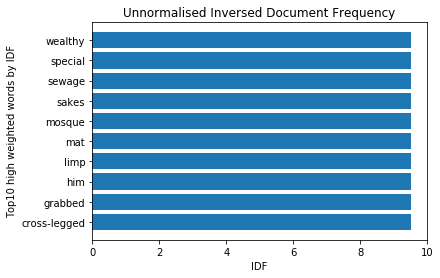

In [22]:
plt.barh(IDF_top10_tokens, IDF_top10_cnts)
plt.title('Unnormalised Inversed Document Frequency')
plt.ylabel('Top10 high weighted words by IDF')
plt.xlabel('IDF')

As we can see, those frequently appeared words in the document get very low IDF compared to those that are not frequently appeared. Therefore, after TF-IDF, we successfully down-weight those frequently appeared words in the document, which benefits the future sentiment analysis.